In [1]:
import pandas as pd

C:\Users\GOPINATH\AppData\Local\Temp\ipykernel_8732\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('Loan_Train.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.drop('Loan_ID',axis=1,inplace=True)

In [10]:
df.shape

(614, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [11]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
categorical_column=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Property_Area','Loan_Status']

In [14]:
for x in categorical_column:
    print(df[x].unique())

['Male' 'Female']
['Yes' 'No']
['1' '0' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
[360. 120. 180.  60. 300. 480. 240.  36.  84.]
['Rural' 'Urban' 'Semiurban']
['N' 'Y']


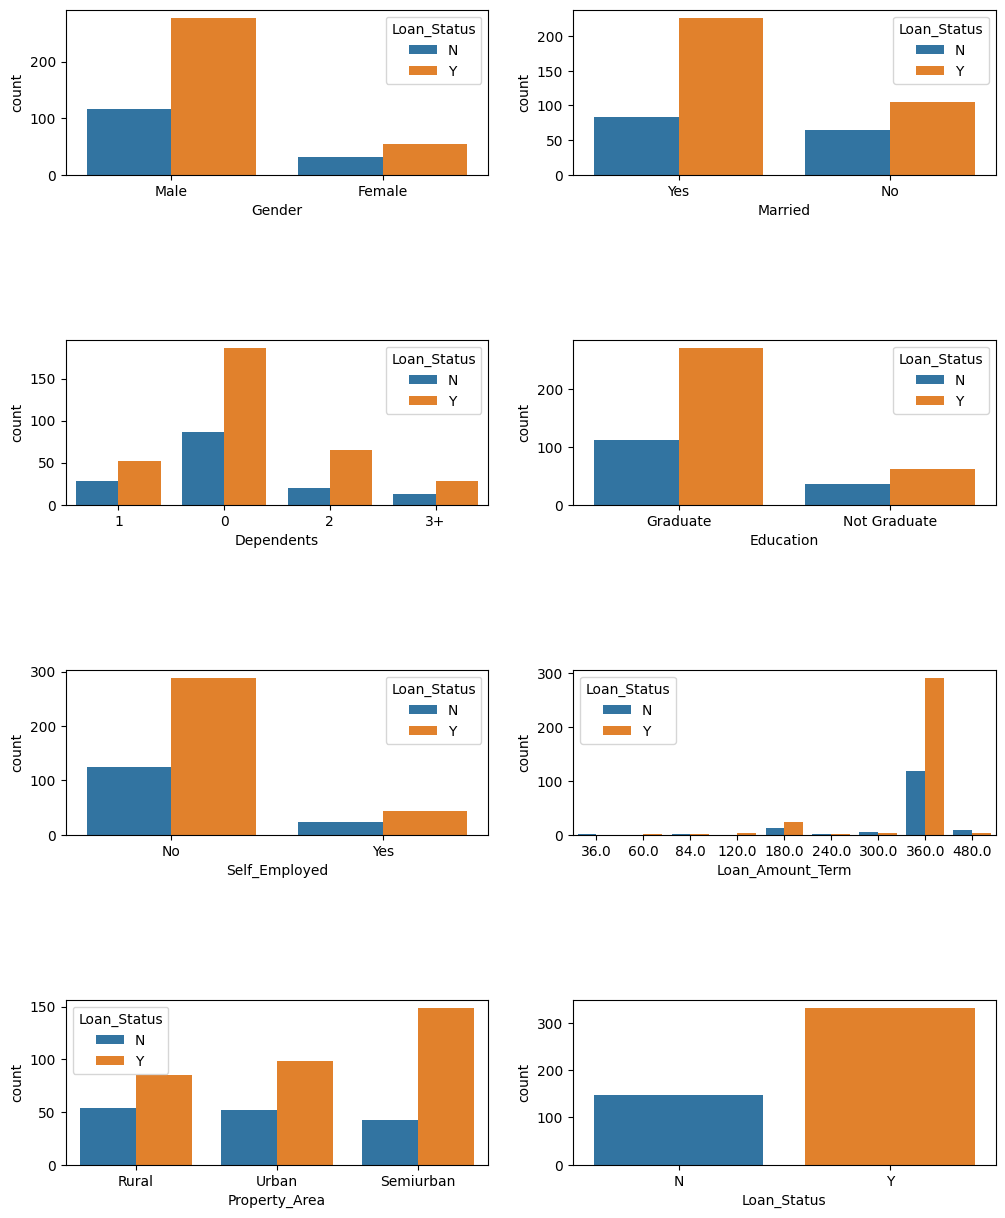

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(4, 2, figsize=(12, 15))
for idx, cat_col in enumerate(categorical_column):
    row, col = idx // 2, idx % 2  # Use integer division for row and col
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=axes[row, col])

plt.subplots_adjust(hspace=1)  # Correct the function name
plt.show()


In [19]:
#data preprocessing

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [22]:
label_encoders ={}
for column in categorical_column:
    label_encoders[column] = LabelEncoder()
    df[column]=label_encoders[column].fit_transform(df[column])

In [23]:
#Model selection and model building

x=df.iloc[:,df.columns!='Loan_Status']
y=df.iloc[:,df.columns=='Loan_Status']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)

# Predictions for training data
y_pred = tree_clf.predict(x_train)

# Print accuracy and F1 score for training data
print("Training Data Set Accuracy: ", accuracy_score(y_train, y_pred))
print("Training Data F1 score: ", f1_score(y_train, y_pred))

# Perform cross-validation and print the mean F1 (macro) and accuracy scores
print("Validation Mean F1 Score: ", cross_val_score(tree_clf, x_train, y_train, cv=5, scoring='f1_macro').mean())
print("Validation Mean Accuracy: ", cross_val_score(tree_clf, x_train, y_train, cv=5, scoring='accuracy').mean())


Training Data Set Accuracy:  1.0
Training Data F1 score:  1.0
Validation Mean F1 Score:  0.6145031448652138
Validation Mean Accuracy:  0.6640806561859194


<Axes: xlabel='Max_Depth', ylabel='Values'>

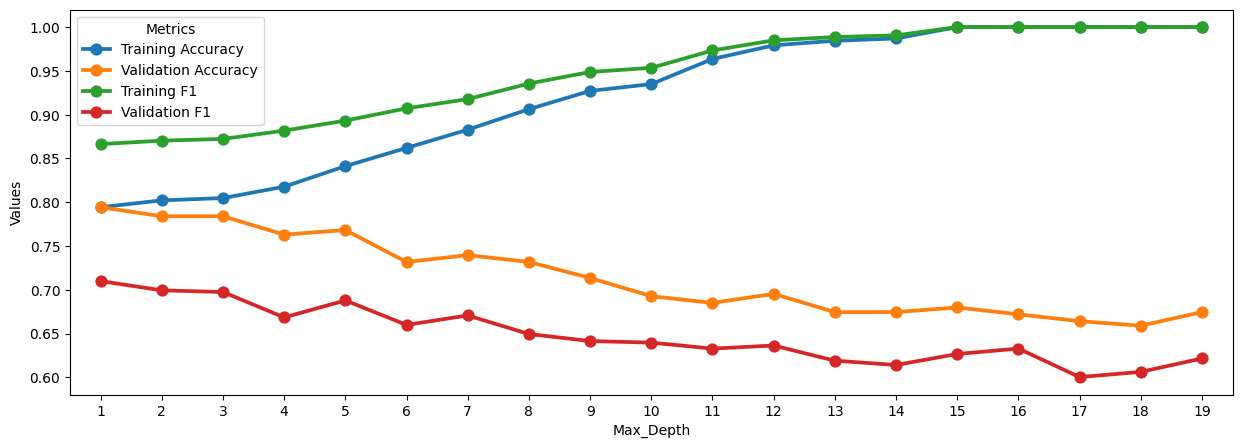

In [33]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

# Loop through tree depths from 1 to 19
for depth in range(1, 20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)  # Define tree with current depth
    tree_clf.fit(x_train, y_train)  # Train the classifier
    
    # Predict on training data
    y_training_pred = tree_clf.predict(x_train)
    
    # Calculate training accuracy and F1 score
    training_acc = accuracy_score(y_train, y_training_pred)
    train_f1 = f1_score(y_train, y_training_pred)
    
    # Perform cross-validation for validation accuracy and F1 score
    val_mean_f1 = cross_val_score(tree_clf, x_train, y_train, cv=5, scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf, x_train, y_train, cv=5, scoring='accuracy').mean()
    
    # Append metrics to the respective lists
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    
    Tuning_Max_depth = {
    "Max_Depth": tree_depths,
    "Training Accuracy": training_accuracy,
    "Validation Accuracy": val_accuracy,
    "Training F1": training_f1,
    "Validation F1": val_f1
}

# Convert the dictionary to a DataFrame
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

# Reshape the DataFrame to have a long format for plotting
plot_df = Tuning_Max_depth_df.melt('Max_Depth', var_name='Metrics', value_name="Values")

# Plot the results
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x="Max_Depth", y="Values", hue="Metrics", data=plot_df, ax=ax)


In [35]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(x_train,y_train)
model = tree_clf
# Predictions for training data
y_pred = tree_clf.predict(x_train)

# Print accuracy and F1 score for training data
print("Training Data Set Accuracy: ", accuracy_score(y_train, y_pred))
print("Training Data F1 score: ", f1_score(y_train, y_pred))

# Perform cross-validation and print the mean F1 (macro) and accuracy scores
print("Validation Mean F1 Score: ", cross_val_score(tree_clf, x_train, y_train, cv=5, scoring='f1_macro').mean())
print("Validation Mean Accuracy: ", cross_val_score(tree_clf, x_train, y_train, cv=5, scoring='accuracy').mean())

Training Data Set Accuracy:  0.8046875
Training Data F1 score:  0.8722316865417377
Validation Mean F1 Score:  0.6973882697795741
Validation Mean Accuracy:  0.7839029391660971


In [38]:
import pickle

In [39]:
with open('LoanFinal.pickle','wb') as f:
    pickle.dump(model,f)
    f.close()

In [40]:
model = pickle.load(open('LoanFinal.pickle','rb'))

In [41]:
y_train.head()

,Loan_Status
134,1
72,1
234,1
34,0
321,1


In [46]:
answer=[[1,1,0,1,0,7600,0.0,104.0,7,0.0,2]]#output=0
#answer=[[1,1,2,0,0,8333,3167.0,165.0,7,1.0,0]]#output=1

In [49]:
print("Predicts: "+str(model.predict(answer)))

Predicts: [1]


c:\Users\GOPINATH\.conda\envs\yolo\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
